<a href="https://colab.research.google.com/github/mudityadev/HotelMLProject/blob/master/ML_Linear_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Hotels in the modern form emerged a long time ago. In 1794 the first hotel (City Hotel) was constructed in New York City
# and it contained 73 rooms. In 1829, Tremont Hotel, the largest and most luxurious hotel in the world, was also created in
# the United States in Boston, where hotel specialists at that time considered that the interior design, building design and
# the equipments of a hotel the evolution of a the modern hotel industry in America and spread out to the rest of the
# world. Ever since, hotels have begun growing and constantly changing from all aspects and in a gradual form.
# Professional theoretical references suggest that hotels are considered one of the key elements that underpin tourism
# industry and the transport of all forms, as well as other activities.
# Not making a full use of the hotel’s absorptive capacity results in the depletion of that hotel’s profit, since ideal
# profitability rate is reached when the "occupancy rates" is equal to the hotel’s absorptive capacity. The main problem for
# the hotels managements is the lack of knowledge of the key factors that control the occupancy rates.
# Approach:
# To address these problems, We will be using Regression algorithms such as Linear Regression,Decision tree, Random
# forest, AdaBoost, GradientBoost and XGBoost. We will train and test the data with these algorithms. From this the best
# model is selected and saved in pkl format. We will also be deploying our model locally using Flask. 

In [ ]:
# We use Random forest to predict the occupancy of hotel

In [ ]:
# Import all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [ ]:
# Import the dataset from csv file and make a dataframe(pandas)
df = pd.read_csv("/content/dataset.csv")


In [ ]:
# Shape of dataframe
df.shape
# row = 9752, col = 8

(9752, 8)

In [ ]:
# See the dataframe
df.head()

,Sno,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,11-02-2015 14:48,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,2,11-02-2015 14:49,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,3,11-02-2015 14:50,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,4,11-02-2015 14:51,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,5,11-02-2015 14:51,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [ ]:
# Occupancy is our target variable
# We have to predict the Occupancy of the hotel according to the weather
df.tail() # bottom data

,Sno,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
9747,9748,18-02-2015 09:15,20.815,27.7175,429.75,1505.25,0.004213,1
9748,9749,18-02-2015 09:16,20.865,27.7450,423.50,1514.50,0.004230,1
9749,9750,18-02-2015 09:16,20.890,27.7450,423.50,1521.50,0.004237,1
9750,9751,18-02-2015 09:17,20.890,28.0225,418.75,1632.00,0.004279,1
9751,9752,18-02-2015 09:19,21.000,28.1000,409.00,1864.00,0.004321,1


In [ ]:
# Main Information from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9752 entries, 0 to 9751
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sno            9752 non-null   int64  
 1   date           9752 non-null   object 
 2   Temperature    9752 non-null   float64
 3   Humidity       9752 non-null   float64
 4   Light          9752 non-null   float64
 5   CO2            9752 non-null   float64
 6   HumidityRatio  9752 non-null   float64
 7   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 609.6+ KB


In [ ]:
# status of distribute data
df.describe()

,Sno,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,4876.500000,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111
std,2815.304246,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408
min,1.000000,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000
25%,2438.750000,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000
50%,4876.500000,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,7314.250000,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000
max,9752.000000,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


In [ ]:
# Find Missing Value from dataset
df.isnull()

,Sno,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
9747,False,False,False,False,False,False,False,False
9748,False,False,False,False,False,False,False,False
9749,False,False,False,False,False,False,False,False
9750,False,False,False,False,False,False,False,False


In [ ]:
# Find missing value according to the features
print(df.isnull().sum())
print("Total missing value = ", df.isnull().sum().sum())

Sno              0
date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64
Total missing value =  0


In [ ]:
# if missing data is there so use
df.dropna(inplace=True) # drop all missing value
print("Total missing value = ", df.isnull().sum().sum())

Total missing value =  0


In [ ]:
# How to drop column
#(imp) run only one time
df.drop(["date"], axis=1, inplace=True)
df.drop(["Sno"], axis=1, inplace=True)

In [ ]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [ ]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,21.7900,31.133333,437.333333,1005.666667,0.005030,1


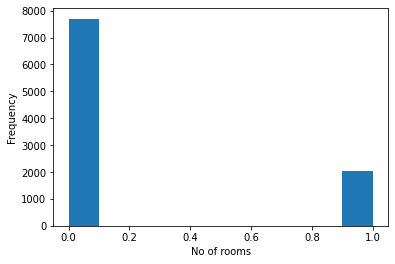

In [ ]:
# Histogram of Occupancy
plt.hist(df["Occupancy"])
plt.xlabel("No of rooms")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Split the dataset from X and y
X = df.iloc[:, :-1] # X = all feature, except target
y = df.iloc[:,-1] # y = only target

In [ ]:
# import from sklearn to split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=100)

In [ ]:
# Size of training dataset
X_train.shape

(7314, 5)

In [ ]:
# Size of train of target
y_train.shape

(7314,)

In [ ]:
#import the LinearRegression estimator from scikit-learn
from sklearn.linear_model import LinearRegression

In [ ]:
#create an instance of the Linear Regression Python object
model = LinearRegression()


In [ ]:
#use scikit-learn’s fit method to train this model on our training data

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(model.coef_)

[-5.58069458e-01 -2.56434111e-01  2.10055070e-03  6.33325054e-05
  1.68613302e+03]


In [ ]:
print(model.intercept_)

11.552203341695607


In [ ]:
# to view the coefficients is by placing them in a DataFrame
pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'])

,Coeff
Temperature,-0.558069
Humidity,-0.256434
Light,0.002101
CO2,0.000063
HumidityRatio,1686.133017


In [ ]:
#To generate predictions from our model using the predict method
predictions = model.predict(X_test)

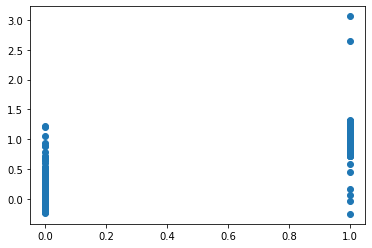

In [ ]:
#to do this is plot the two arrays using a scatterplot. 

plt.scatter(y_test, predictions)

(array([1.000e+00, 1.000e+00, 2.000e+00, 5.000e+00, 3.300e+01, 1.730e+02,
        2.209e+03, 1.000e+01, 1.000e+00, 3.000e+00]),
 array([-2.06037909, -1.72911972, -1.39786036, -1.06660099, -0.73534162,
        -0.40408226, -0.07282289,  0.25843647,  0.58969584,  0.92095521,
         1.25221457]),
 <a list of 10 Patch objects>)

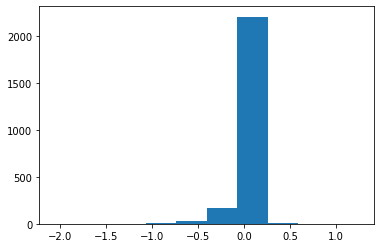

In [ ]:

plt.hist(y_test - predictions)

In [ ]:
#Testing the Performance of our Model
#calculate mean squared error

from sklearn import metrics

sol = metrics.mean_squared_error(y_test, predictions) 
sol

0.018963201089670024

In [ ]:
#Finding Accuracy
100-sol


99.98103679891032